In [4]:
import scipy.stats as ss

def get_bagging_acc(n, p): 
    """
    Get bagging accuracy.
    
    Parameters
    ----------
    n : a number
    funs : a list of functions
    """
    
    # Initialize bagging accuracy
    bagging_acc = 0
    
    # Get the binomial distribution
    binom_dist = ss.binom(n, p)
    
    # For each in in [floor(n / 2) + 1, n]
    for i in range(n // 2 + 1, n + 1):
        # Update bagging accuracy
        bagging_acc += binom_dist.pmf(i)

    return bagging_acc

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot(n, p, step):
    """
    Plot the run time of the functions (with respect to the input size).
    
    Parameters
    ----------
    n : a number
    funs : a list of functions
    the incrementation
    """
    
    xs= list(range(1, n + 2, step))
    ys = [get_bagging_acc(x, p) for x in xs]
    
    plt.plot(xs, ys, color='g')
    plt.xlabel('Number of models')
    plt.ylabel('Accuracy')
    plt.xticks([min(xs), max(xs) - 1])
    plt.yticks([0.1 * i for i in range(5, 11)])
    plt.ylim([0.5, 1.0])
    plt.tight_layout()
    plt.savefig('/Users/yhuang/Desktop/accuracy.pdf')
    plt.show()

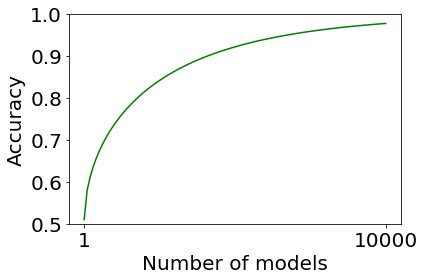

In [38]:
plot (10000, 0.51, 100)

In [57]:
# Set random seed in numpy
import numpy as np
np.random.seed(42)

In [58]:
def get_boosting_pred(n): 
    """
    Get bagging accuracy.
    
    Parameters
    ----------
    n : a number
    funs : a list of functions
    """
    
    # Initialize bagging accuracy
    y1_pred = np.random.uniform(low=0, high=1)
    
    y_pred = [y1_pred]
    
    for k in range(2, n + 1):
        residual = 1 - np.sum(y_pred)
        low, high = np.min([0, residual]), np.max([0, residual])
        yk_pred = np.random.uniform(low=low, high=high)
        y_pred.append(yk_pred)

    return y_pred

In [59]:
y_pred = get_boosting_pred(10)

In [60]:
[np.sum(y_pred[: i + 1]) for i in range(10)]

[0.3745401188473625,
 0.9691737759446208,
 0.9917383852020794,
 0.9966842709940223,
 0.9972015865256105,
 0.9976381236932503,
 0.9977753100006408,
 0.9997022834098298,
 0.9998812453214261,
 0.9999653322528093]

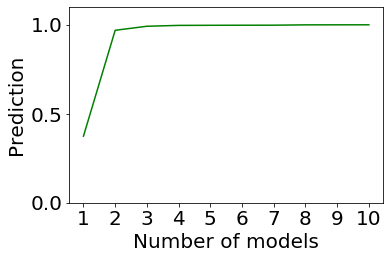

In [76]:

    
xs= list(range(1, 11))
ys = [np.sum(y_pred[: i + 1]) for i in range(10)]

plt.plot(xs, ys, color='g')
plt.xlabel('Number of models')
plt.ylabel('Prediction')
plt.xticks([i for i in range(1, 11)])
#plt.yticks([0.1 * i for i in range(5, 11)])
plt.ylim([0, 1.1])
plt.tight_layout()
plt.savefig('/Users/yhuang/Desktop/prediction.pdf')
plt.show()